**Data Science**

**Spring 2025**

*Raya Namazi-Assignment 9*

*Link of the notebook* : https://colab.research.google.com/drive/1pXbdelFG6KQdS86xNsvKrgK5MS5U5-nu#scrollTo=O3z77YYzaiyX

---

# About the Dataset
On this notebbok we are going to implement various neural networks in python using scikit-learn, pytorch and keras.

The data set we are using for this implementaition is London Bike dataset which is hosted on [Kaggle](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset/data)

It contains hourly bike rental data form a bike-sharing system and has 17,414 rows and 10 columns.

# Libraries
First we need to import libraries we will need later on.

In [ ]:
import sklearn
import pandas as pd
import io
import os
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

# Loading the Dataset
Now it's time to laod the dataset from Kaggle.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Datasets"

In [ ]:
%cd /content/drive/My Drive/Datasets

/content/drive/My Drive/Datasets


In [ ]:
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  london-bike-sharing-dataset.zip
replace london_merged.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [289]:
df = pd.read_csv('london_merged.csv')

# Getting some insights about the Dataset
Now let's take a look at the features and some details about the dataset.

In [ ]:
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


It seems like we don't have any null values in the dataset.

We can also take a look at statistical values of columns.

In [ ]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


# Feature Engineering
In the next step we prepare our data for later tasks.

Let's convert all columns to numerical values.

In [ ]:
df.select_dtypes(include = object).columns

Index(['timestamp'], dtype='object')

The only non-numerical column is timestamp column.Let's take a look at it.

In [ ]:
df['timestamp']

,timestamp
0,2015-01-04 00:00:00
1,2015-01-04 01:00:00
2,2015-01-04 02:00:00
3,2015-01-04 03:00:00
4,2015-01-04 04:00:00
...,...
17409,2017-01-03 19:00:00
17410,2017-01-03 20:00:00
17411,2017-01-03 21:00:00
17412,2017-01-03 22:00:00


Let's convert it to datetime object so we can break it to multiple columns for day, month, year, etc.

In [290]:
df['timestamp'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')
df['timestamp']

,timestamp
0,2015-01-04 00:00:00
1,2015-01-04 01:00:00
2,2015-01-04 02:00:00
3,2015-01-04 03:00:00
4,2015-01-04 04:00:00
...,...
17409,2017-01-03 19:00:00
17410,2017-01-03 20:00:00
17411,2017-01-03 21:00:00
17412,2017-01-03 22:00:00


Now let's break this column to multiple columns.

In [291]:
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Hour'] = df['timestamp'].dt.hour
df['Minute'] = df['timestamp'].dt.minute
df['Second'] = df['timestamp'].dt.second

In [ ]:
df[['Day','Year','Month','Hour','Minute','Second']].head(10)

,Day,Year,Month,Hour,Minute,Second
0,4,2015,1,0,0,0
1,4,2015,1,1,0,0
2,4,2015,1,2,0,0
3,4,2015,1,3,0,0
4,4,2015,1,4,0,0
5,4,2015,1,5,0,0
6,4,2015,1,6,0,0
7,4,2015,1,7,0,0
8,4,2015,1,8,0,0
9,4,2015,1,9,0,0


Now we drop the timestamp column since we don't need it anymore.

In [292]:
df = df.drop('timestamp',axis=1)
df.head(10)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day,Hour,Minute,Second
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,0,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,0,0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,0,0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,0,0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,0,0
5,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015,1,4,5,0,0
6,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,4,6,0,0
7,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,4,7,0,0
8,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,2015,1,4,8,0,0
9,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,2015,1,4,9,0,0


Let's take a look at values in second and minute columns.

In [ ]:
df['Second'].unique()

array([0], dtype=int32)

In [ ]:
df['Minute'].unique()

array([0], dtype=int32)

Since all values are zero, let's drop this columns.

In [293]:
df = df.drop(['Second','Minute'],axis=1)

Let's make sure all columns are numerical.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   Year          17414 non-null  int32  
 10  Month         17414 non-null  int32  
 11  Day           17414 non-null  int32  
 12  Hour          17414 non-null  int32  
dtypes: float64(8), int32(4), int64(1)
memory usage: 1.5 MB


# Data Cleaning
Since we saw earlier that there is no missing value, let's just mkae sure that we dont have any duplicated rows as well.

In [ ]:
df.duplicated().sum()

np.int64(0)

# EDA
Let's take a look at some of the features.

We can visualize the distribution of bike counts for each season.

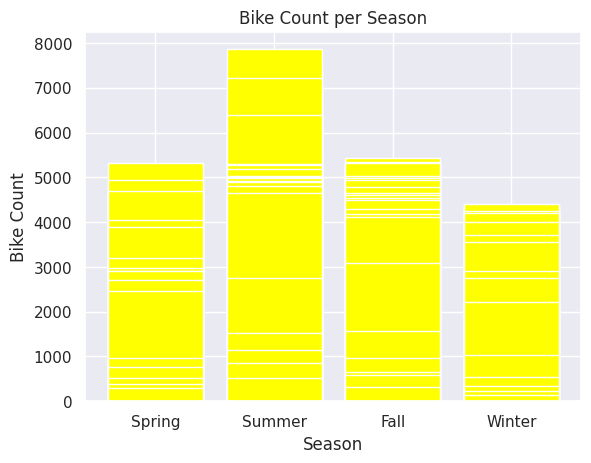

In [ ]:
plt.bar(df['season'],df['cnt'],color = 'yellow')
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.title('Bike Count per Season')
plt.xticks([0,1,2,3],['Spring','Summer','Fall','Winter'])
plt.show()

As we can see the bike rental improves in summer.
Let's check the distribution of bike count in holiday and not-holiday days.

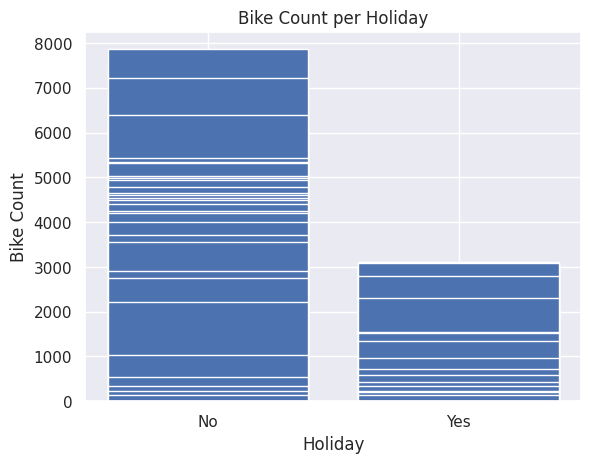

In [ ]:
plt.bar(df['is_holiday'],df['cnt'])
plt.xlabel('Holiday')
plt.ylabel('Bike Count')
plt.title('Bike Count per Holiday')
plt.xticks([0,1],['No','Yes'])
plt.show()

We can also check how weather affects bike rental.
First we need to check what does each weather code means.

In [ ]:
weather_map = { 1:'clear',
                2:'scatteredClouds',
                3:'brokenClouds',
                4:'cloudy',
                7:'lightRain',
                10:'heavyRain',
                26:'snowFall',
                94:'freezingFog'}

df['weather'] = df['weather_code'].map(weather_map)

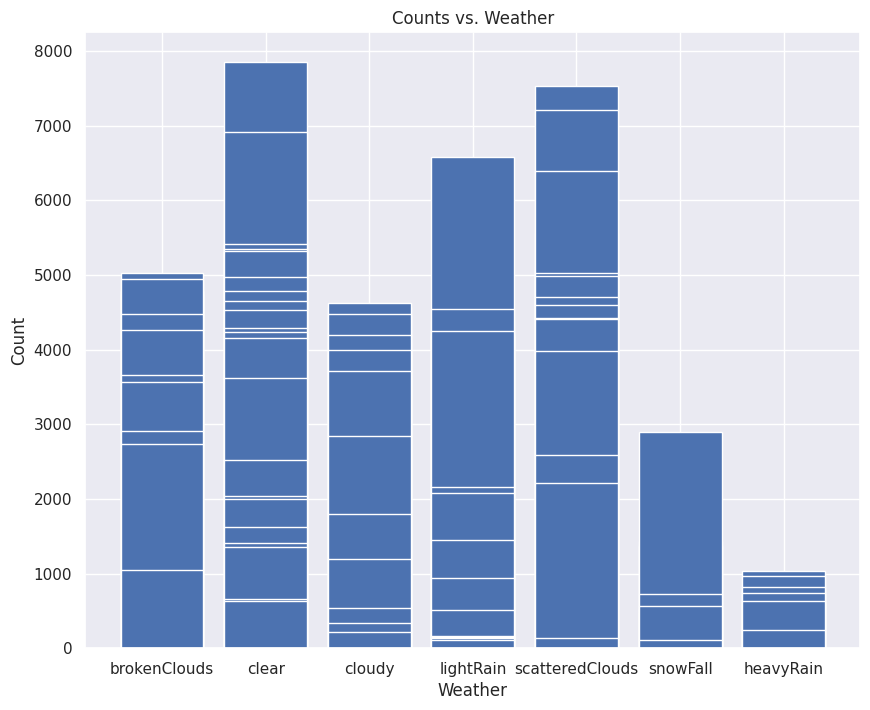

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['weather'], df['cnt'])
plt.title('Counts vs. Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

# Regression


## Splitting into Train and Test sets
Now it's time prepare our train and test sets.
First we need to define our target.


In [ ]:
df_copy = df.copy()
y = df_copy.pop('cnt')
X = df_copy

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(13931, 13)
(3483, 13)


## Normalization/Standardization
Now we normalize all our columns(except encoded ones), so they would be in the same range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
to_normalize = ['t1','t2','hum','wind_speed','Year','Month','Day','Hour']
standard_scaling_columns = list(to_normalize)
X_train[standard_scaling_columns] = scaler.fit_transform(X_train[standard_scaling_columns])
X_test[standard_scaling_columns] = scaler.fit_transform(X_test[standard_scaling_columns])
X_train.describe()
y_train = pd.Series(scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten(), index=y_train.index, name=y_train.name)
y_test = pd.Series(scaler.transform(y_test.values.reshape(-1, 1)).flatten(), index=y_test.index, name=y_test.name)

In [ ]:
X_train.describe()

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day,Hour
count,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000
mean,0.398150,0.442656,0.642076,0.281605,2.732395,0.022611,0.285263,1.503194,0.253320,0.502033,0.491999,0.499696
std,0.158282,0.166775,0.185035,0.139465,2.335352,0.148667,0.451556,1.119000,0.254399,0.314903,0.293306,0.301423
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271429,0.303797,0.519481,0.176991,1.000000,0.000000,0.000000,1.000000,0.000000,0.272727,0.233333,0.217391
50%,0.400000,0.468354,0.675325,0.265487,2.000000,0.000000,0.000000,2.000000,0.500000,0.545455,0.500000,0.521739
75%,0.500000,0.556962,0.779221,0.362832,3.000000,0.000000,1.000000,3.000000,0.500000,0.818182,0.733333,0.782609
max,1.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train.describe()

,cnt
count,13931.000000
mean,0.145155
std,0.137616
min,0.000000
25%,0.033333
50%,0.107125
75%,0.211514
max,1.000000


## Multilayer Perceptron using Scikit-learn
For this task, we use MLPClassifier(Multi Layer Perceptron Classifier).

I use relu for activation function since it has wroked pretty good for so many cases.

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,80),
                   activation='relu',
                   max_iter=500)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 80), max_iter=500)

Now we use out model to predict on the test set.

In [ ]:
prediction = model.predict(X_test)

Now let's measure the R2 score.

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print(score)

0.8462832665324663


## Multilayer Feedforward Network with Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks
import tensorflow as tf

First we need to define e sequential model.

In [ ]:
model = Sequential()

Let's start with 2 hidden layers and tune it based on what we get.

In [ ]:
model.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='linear'))

model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


I define early stopping so that if the change in the loss function was less than 0.001 and the number of epochs had exceeded 20, the training process would stop.


In [ ]:
early_stopping = callbacks.EarlyStopping(min_delta=0.001,
                                          patience=20,
                                          restore_best_weights=True)

Since the problem we are working on, I use mean squared error as the loss function, also i use Adam as the optimizer to update the weights in the tarining process.

In [ ]:
model.compile(optimizer='adam', loss='mse')

I use %20 of the training data for validation set so the loss would be monitored during the training process.It helps to prevent from overfitting.

In [ ]:
history=model.fit(X_train,
                  y_train,
                  epochs=30,
                  batch_size=32,
                  validation_split=0.2,
                  callbacks=[early_stopping])

Epoch 1/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0394 - val_loss: 0.0136
Epoch 2/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0134 - val_loss: 0.0127
Epoch 3/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0127 - val_loss: 0.0116
Epoch 4/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0116 - val_loss: 0.0102
Epoch 5/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 6/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 7/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 8/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0092 - val_loss: 0.0105
Epoch 9/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 10/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 11/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 12/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [ ]:
from sklearn.metrics import r2_score
predictions=model.predict(X_test)
print('R2-score is %.2f' %r2_score(y_test, predictions))

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2-score is 0.88


We can also change the loss function to mae as well.

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='relu'))

model.add(Dense(1,activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mae')

In [ ]:
model.fit(X_train,
          y_train,
          epochs=30,
          batch_size=32,
          validation_split=0.2,
          callbacks=[early_stopping])

Epoch 1/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0958 - val_loss: 0.0714
Epoch 2/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0715 - val_loss: 0.0697
Epoch 3/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0678 - val_loss: 0.0646
Epoch 4/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0657 - val_loss: 0.0637
Epoch 5/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0624 - val_loss: 0.0586
Epoch 6/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0586 - val_loss: 0.0569
Epoch 7/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0572 - val_loss: 0.0564
Epoch 8/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0541 - val_loss: 0.0537
Epoch 9/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0546 - val_loss: 0.0547
Epoch 10/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0525 - val_loss: 0.0527
Epoch 11/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0529 - val_loss: 0.0513
Epoch 12/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
predictions = model.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print('R2-score is %.2f' %r2_score(y_test,predictions))

R2-score is 0.80


So changing loss function from mse to mae made our predictions slightly worse.

## Multilayer Feedforward Network with PyTorch

Now, we will implement multilayer feedforwarding again, but this time using PyTorch.

First we need to import libraries we need.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor

For using Pytorch models we need to convert our training and test set to PyTorch tensors.

Also we need to convert everything to float type which is the default type PyTorch tensors.

In [ ]:
tensor_X_train = Tensor(X_train.values.astype(np.float32))
tensor_y_train = Tensor(y_train.values.astype(np.float32))
tensor_X_test = Tensor(X_test.values.astype(np.float32))
tensor_y_test = Tensor(y_test.values.astype(np.float32))

We make Tensor Dataset so each datapoint would be paired with its target value.

In [ ]:
train_set=TensorDataset(tensor_X_train,tensor_y_train)
test_set=TensorDataset(tensor_X_test,tensor_y_test)

Now, we use TensorDataset along with a DataLoader so that during training, random batches are output for each iteration (since the `shuffle` parameter is set to `True`).


In [ ]:
train_dl = DataLoader(train_set,batch_size=16,shuffle=True)
test_dl = DataLoader(test_set,batch_size=16,shuffle=True)

Now it's time to make the layers.It's like what we did in feedforwarding with Keras with small changes in the syntax.

Each time we add a layer and then set an activation function for the output of that layer.

In [ ]:
layers=[]

layers.append(nn.Linear(X_train.shape[1],30))
layers.append(nn.ReLU())

layers.append(nn.Linear(30,20))
layers.append(nn.Sigmoid())

layers.append(nn.Linear(20,5))
layers.append(nn.Sigmoid())

layers.append(nn.Linear(5,1))
layers.append(nn.Sigmoid())

model=nn.Sequential(*layers)

Like what we did in Keras, we use mean squared error for loss function and Adam for the optimizer.

In [ ]:
import torch
from torch import nn

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

Unlike in Keras, we need to implement to training process by looping the number of epochs.

In [ ]:
for epoch in range(80):
    running_loss = 0.0 #initialize a variable to track the loss in the current epoch
    for i, (inputs, targets) in enumerate(train_dl):
        optimizer.zero_grad() #clears gradiant from the previous epoch

        yhat = model(inputs) #takes a batch and produces a prediction vector for that batch.

        loss = criterion(yhat.ravel(), targets) #calculates the loss between the prediction and avtual values.

        loss.backward() #computes the gradiants of the loss using backpropagation

        optimizer.step() #updates the model's parameters using the gradiants in loss.backward() method.

        running_loss += loss.item() #adds the loss of the current batch to tunning loss of the current epoch
        if not i % 50: #periodic logging of the loss
            print('[%d, %5d] Loss: %.4f' % (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

[1,     1] Loss: 0.0049
[1,    51] Loss: 0.2413
[1,   101] Loss: 0.2340
[1,   151] Loss: 0.2339
[1,   201] Loss: 0.2361
[1,   251] Loss: 0.2319
[1,   301] Loss: 0.2337
[1,   351] Loss: 0.2266
[1,   401] Loss: 0.2178
[1,   451] Loss: 0.2129
[1,   501] Loss: 0.2083
[1,   551] Loss: 0.1972
[1,   601] Loss: 0.2007
[1,   651] Loss: 0.1912
[1,   701] Loss: 0.1883
[1,   751] Loss: 0.1848
[1,   801] Loss: 0.1853
[1,   851] Loss: 0.1843
[2,     1] Loss: 0.0030
[2,    51] Loss: 0.1860
[2,   101] Loss: 0.1762
[2,   151] Loss: 0.1792
[2,   201] Loss: 0.1812
[2,   251] Loss: 0.1704
[2,   301] Loss: 0.1753
[2,   351] Loss: 0.1582
[2,   401] Loss: 0.1694
[2,   451] Loss: 0.1729
[2,   501] Loss: 0.1646
[2,   551] Loss: 0.1593
[2,   601] Loss: 0.1599
[2,   651] Loss: 0.1701
[2,   701] Loss: 0.1754
[2,   751] Loss: 0.1665
[2,   801] Loss: 0.1632
[2,   851] Loss: 0.1578
[3,     1] Loss: 0.0025
[3,    51] Loss: 0.1726
[3,   101] Loss: 0.1489
[3,   151] Loss: 0.1561
[3,   201] Loss: 0.1597
[3,   251] Loss:

In [ ]:
all_targets = [] # a list to store all target values from the test set
with torch.no_grad():
    for inputs, targets in test_dl:
        all_targets.append(targets.detach().numpy()) #converts the targets to numpy array and stores it in the list
all_targets = np.concatenate(all_targets) #concatenate all target arrays into a single array.
y_mean = np.mean(all_targets) #computes the mean of all target values for computing r2 score later.


ssr = 0.0 # a variable for the sum of squared erros between predictions and the actual values.
sst = 0.0 # a variable for the total sum of the squares

with torch.no_grad():
    for i, (inputs, targets) in enumerate(test_dl): #iterates over the test dataloader to compute ssr and sst

        yhat = model(inputs).ravel().detach().numpy()
        targets = targets.detach().numpy()

        ssr += np.sum((targets - yhat) ** 2)
        sst += np.sum((targets - y_mean) ** 2)

r2 = 1 - (ssr / sst)
print(f'R² score: {r2:.2f}')

R² score: 0.82


## Non-Sequential Feedforward Network using Keras

The non-sequential feedforwarding process is similar, but the key difference is that a layer can be connected not only to the next layer, but also to deeper layers beyond it.


In [294]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

In [307]:
input_layer = Input(shape=(X_train.shape[1],))

hidden_layer_1 = Dense(20,activation='relu')(input_layer)

hidden_layer_2 = Dense(10,activation='relu')(hidden_layer_1)

hidden_layer_3 = Dense(5,activation='relu')(hidden_layer_1)

add_layer = Concatenate()([hidden_layer_3,hidden_layer_2]) #combines the output of hidden layers 1 and 2

output_layer = Dense(1,activation = 'linear')(add_layer)

model = Model(inputs=input_layer, outputs=output_layer)

Similar to the las models, we set optimizar to Adams and loss function to mse and also track the mse as well.

In [308]:
model.compile(optimizer='adam',loss='mse',metrics = [tf.keras.metrics.RootMeanSquaredError()])

We can also visualize the neural netwrok to get a better sense of it.(The `show_shapes` arg, shows the input and output shape of each layer)

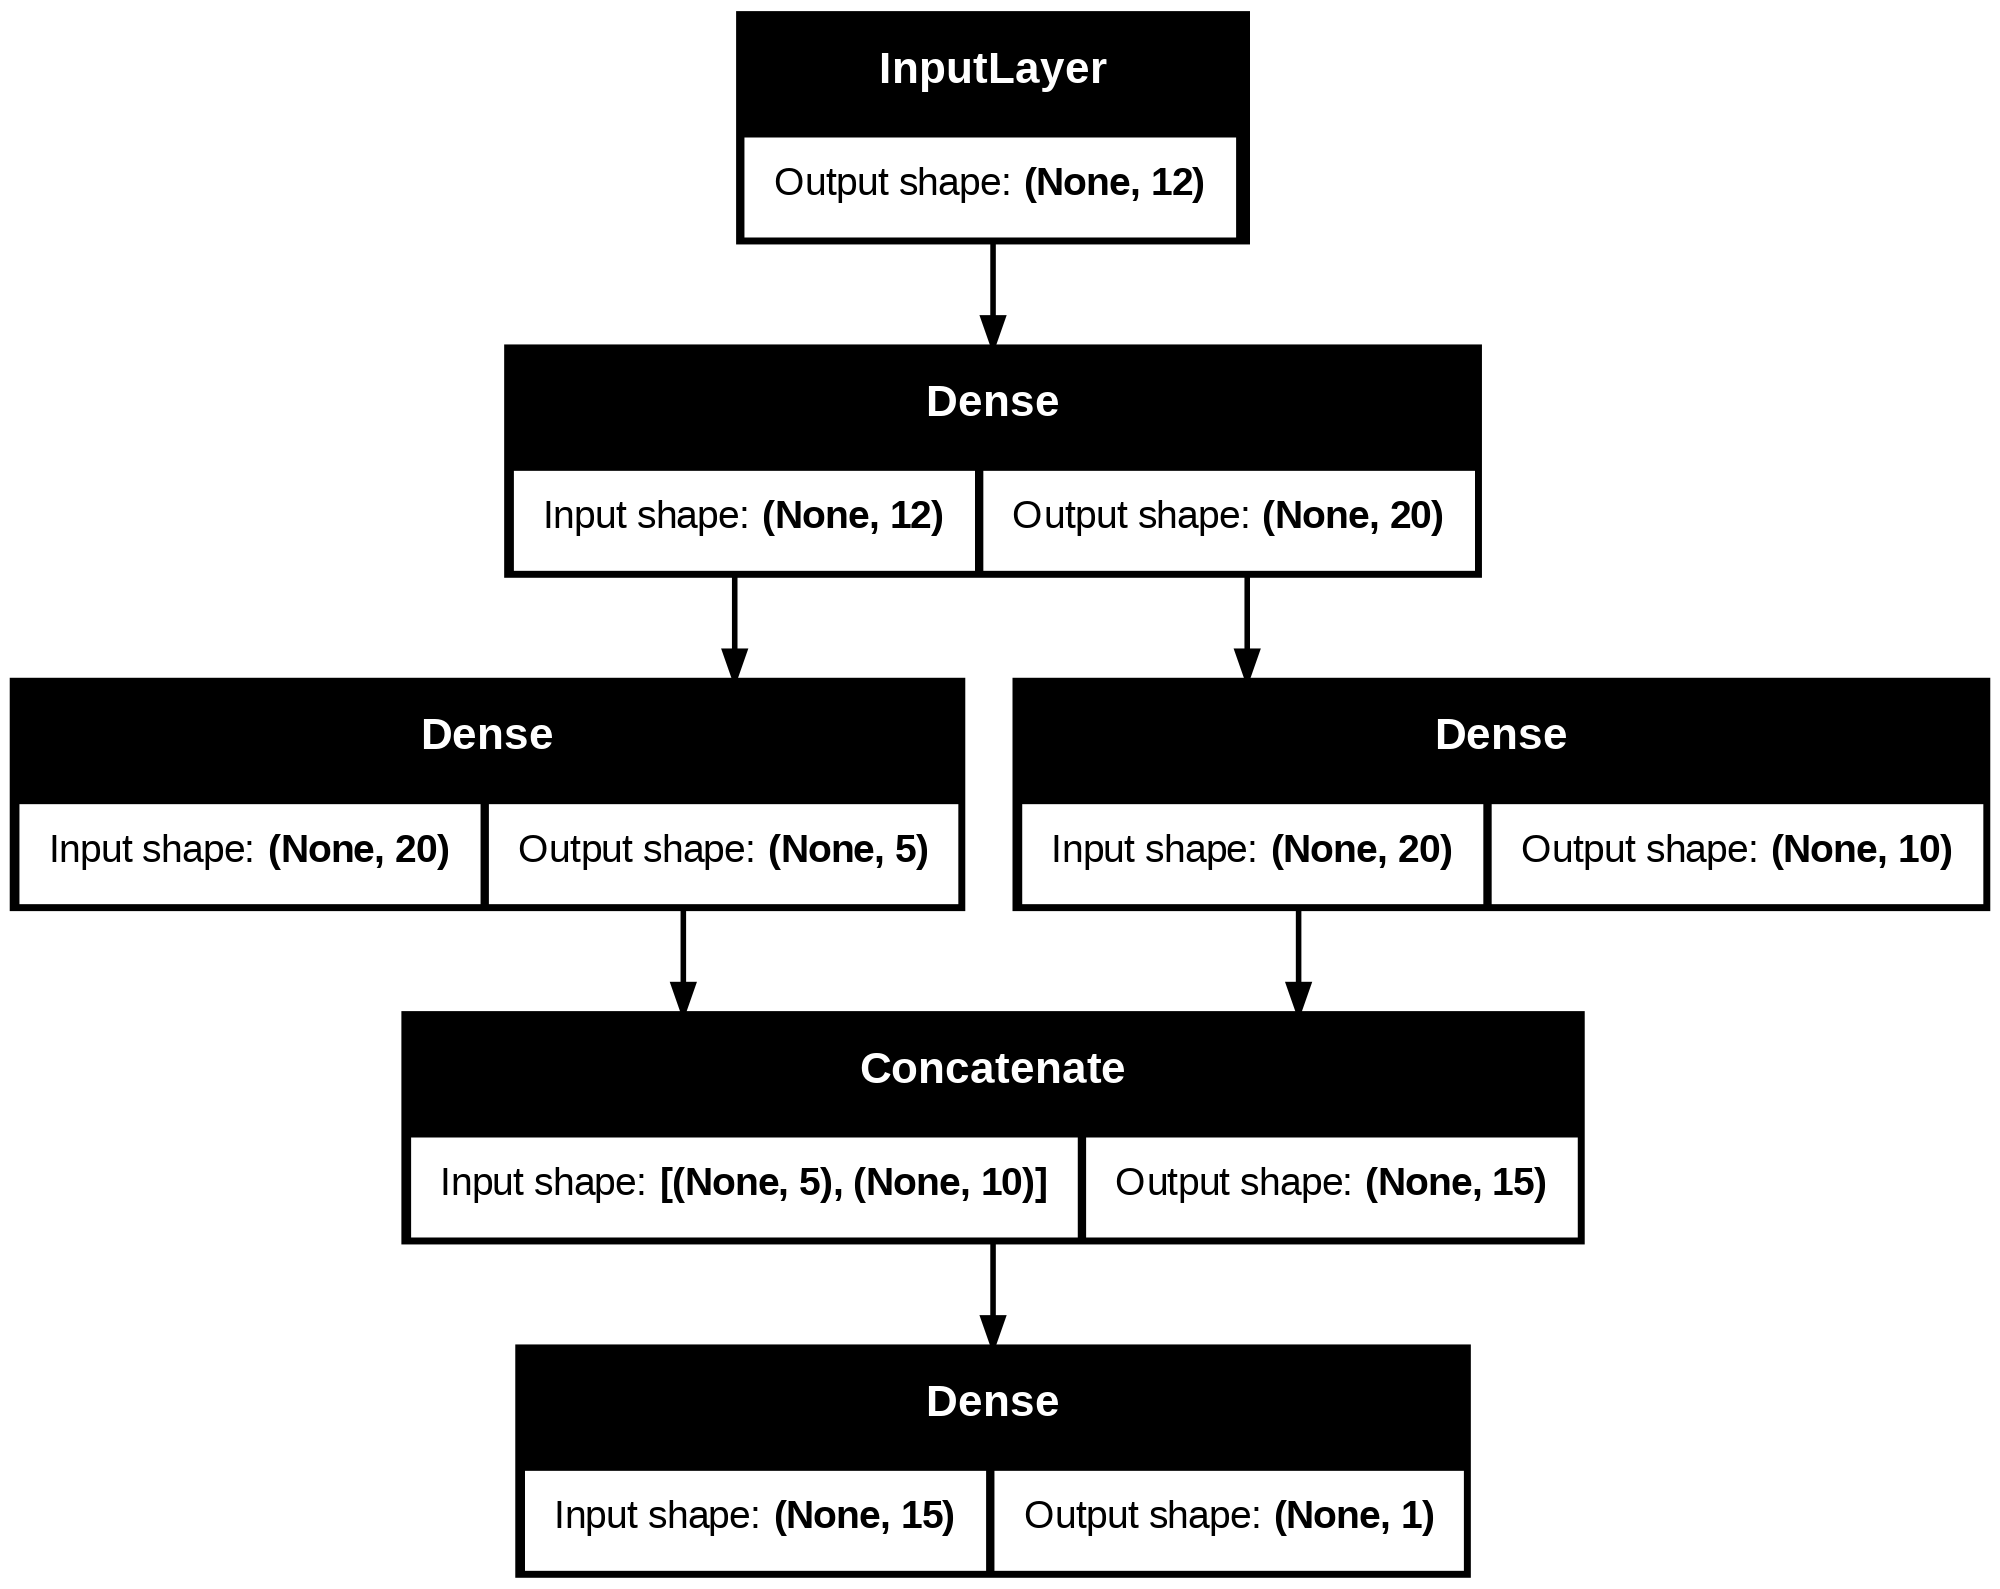

In [309]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [310]:
model.fit(X_train,
          y_train,
          batch_size = 16,
          epochs = 60,
          validation_split=0.2,
          callbacks=[early_stopping])

Epoch 1/60
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7448 - root_mean_squared_error: 0.8502 - val_loss: 0.2051 - val_root_mean_squared_error: 0.4529
Epoch 2/60
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1570 - root_mean_squared_error: 0.3956 - val_loss: 0.0915 - val_root_mean_squared_error: 0.3026
Epoch 3/60
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0839 - root_mean_squared_error: 0.2896 - val_loss: 0.0610 - val_root_mean_squared_error: 0.2470
Epoch 4/60
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0621 - root_mean_squared_error: 0.2492 - val_loss: 0.0575 - val_root_mean_squared_error: 0.2399
Epoch 5/60
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0532 - root_mean_squared_error: 0.2305 - val_loss: 0.0452 - val_root_mean_squared_error: 0.2127
Epoch 6/60
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0493 - root_mean_squared_error: 0.2219 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2005
Epoch 7/60
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step 

In [311]:
prediction = model.predict(X_test)
print('R2 score : %.2f' %r2_score(y_test,prediction))

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2 score : 0.95


# Classification


## Adding Target Column

For the classification task, we first add a target column indicating whether a specific hour was a high-demand period for bike rentals or not.


In [312]:
threshold = df['cnt'].mean()

In [313]:
df['demand'] = (df['cnt']>threshold).astype(int)

Let's check the balnce between classes.

In [ ]:
df['demand'].value_counts()

,count
demand,
0,10605
1,6809


The balance seems ok for a binary classification problem.

## Splitting into Train and Test sets

Next we split our dataset into the train and test sets.

In [314]:
y = df.pop('demand')
X = df.drop(columns=['cnt'])
# features the same as the regression task

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Normalization/Standardization

Now we need to normalize numerical values so they would be in the same range.

In [316]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
to_normalize = ['t1','t2','hum','wind_speed','Year','Month','Day','Hour']
standard_scaling_columns = list(to_normalize)
X_train[standard_scaling_columns] = scaler.fit_transform(X_train[standard_scaling_columns])
X_test[standard_scaling_columns] = scaler.fit_transform(X_test[standard_scaling_columns])
X_train.describe()

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day,Hour
count,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.00000,13931.000000,13931.000000,13931.000000,13931.000000
mean,0.393951,0.438450,0.651048,0.282644,2.739717,0.022109,0.289355,1.49013,0.254935,0.502379,0.492274,0.501659
std,0.157281,0.165668,0.181041,0.139871,2.367800,0.147043,0.453479,1.11864,0.254302,0.313925,0.293690,0.300572
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.267606,0.300000,0.534591,0.176991,1.000000,0.000000,0.000000,0.00000,0.000000,0.272727,0.233333,0.260870
50%,0.394366,0.462500,0.679245,0.265487,2.000000,0.000000,0.000000,1.00000,0.500000,0.545455,0.500000,0.521739
75%,0.492958,0.550000,0.786164,0.362832,3.000000,0.000000,1.000000,2.00000,0.500000,0.818182,0.733333,0.782609
max,1.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000


## Multilayer Preceptron using Scikit-learn

We use scikit-learn multi-layer perceptron classifier with 2 hidden layers of 5 and 2 neurons.

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),max_iter=900)
model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=900,
              solver='lbfgs')

In [ ]:
from sklearn.metrics import f1_score
prediction=model.predict(X_test)
print('f1 score : %.2f' %f1_score(y_test,prediction,average='macro'))

f1 score : 0.83


Let's increase the number of neurons in the hidden layers.

In [ ]:
model = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,5),max_iter=900)
model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5), max_iter=900,
              solver='lbfgs')

In [ ]:
prediction=model.predict(X_test)
print('f1 score : %.2f' %f1_score(y_test,prediction,average='macro'))

f1 score : 0.84


It didn't improve that much.

## Multilayer Feedforawrd Network using Keras

Next we do sequential feedforwarding like we did for the regression task.

In [ ]:
model = Sequential()

model.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


defining early stoppping the same as the regression part.

In [ ]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

For classification, we use binary crossentropy for the loss function and also monitor precision and recall.

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    )

Let's work with 20 epochs and see the result for now.

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 16,
                    epochs = 20,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                    )

Epoch 1/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5905 - precision: 0.6622 - recall: 0.2844 - val_loss: 0.4901 - val_precision: 0.7370 - val_recall: 0.5750
Epoch 2/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4663 - precision: 0.7442 - recall: 0.6582 - val_loss: 0.4385 - val_precision: 0.7852 - val_recall: 0.6155
Epoch 3/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4216 - precision: 0.7696 - recall: 0.6799 - val_loss: 0.3814 - val_precision: 0.7680 - val_recall: 0.7461
Epoch 4/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3726 - precision: 0.7736 - recall: 0.7181 - val_loss: 0.3535 - val_precision: 0.8228 - val_recall: 0.6495
Epoch 5/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3385 - precision: 0.7927 - recall: 0.7542 - val_loss: 0.3245 - val_precision: 0.8213 - val_recall: 0.7102
Epoch 6/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3126 - precision: 0.8023 - recall: 0.7841 - val_loss: 0.3230 - val_precision: 0.7444 - val_recall:

In [ ]:
prediction = model.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


We have to put a threshold for the prediction because the sigmoid function outputs the probability which is a continous value.

Here, if the probabilty was more than 0.5 the datapoint is assigned to class 1 otherwise, it is assigned to class 0.

In [ ]:
print('f1 score : %.2f' %f1_score(y_test,prediction>0.5,average='macro'))

f1 score : 0.89


The result is pretty great.

## Non-Sequential Feedforward Network with Keras

We do non-sequential feedforwarding network like we did for regression part.

In [317]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

In [318]:
input_layer = Input(shape=(X_train.shape[1],))

hidden_layer_1 = Dense(20,activation='relu')(input_layer)

hidden_layer_2 = Dense(10,activation='relu')(hidden_layer_1)

hidden_layer_3 = Dense(5,activation='relu')(hidden_layer_1)

add_layer = Concatenate()([hidden_layer_3,hidden_layer_2]) #combines the output of hidden layers 1 and 2

output_layer = Dense(1,activation = 'linear')(add_layer)

model = Model(inputs=input_layer, outputs=output_layer)

We use binary cross entropy for the loss function.

In [319]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    )

In [320]:
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8334 - precision_4: 0.4541 - recall_4: 0.2990 - val_loss: 0.5350 - val_precision_4: 0.7288 - val_recall_4: 0.6132
Epoch 2/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5114 - precision_4: 0.7201 - recall_4: 0.6016 - val_loss: 0.5241 - val_precision_4: 0.8254 - val_recall_4: 0.5040
Epoch 3/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5020 - precision_4: 0.7238 - recall_4: 0.5781 - val_loss: 0.4901 - val_precision_4: 0.7834 - val_recall_4: 0.5833
Epoch 4/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4590 - precision_4: 0.7565 - recall_4: 0.5977 - val_loss: 0.4697 - val_precision_4: 0.8175 - val_recall_4: 0.5604
Epoch 5/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4351 - precision_4: 0.7874 - recall_4: 0.5863 - val_loss: 0.4321 - val_precision_4: 0.8314 - val_recall_4: 0.5648
Epoch 6/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4645 - precision_4: 0.7970 - recall_4: 0.5853 - val_loss: 

In [321]:
prediction = model.predict(X_test)
print('f1 score : %.2f' %f1_score(y_test,prediction>0.5,average='macro'))

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
f1 score : 0.81


Let's change the activation function of the output layer to sigmoid.

In [322]:
input_layer = Input(shape=(X_train.shape[1],))

hidden_layer_1 = Dense(20,activation='relu')(input_layer)

hidden_layer_2 = Dense(10,activation='relu')(hidden_layer_1)

hidden_layer_3 = Dense(5,activation='relu')(hidden_layer_1)

add_layer = Concatenate()([hidden_layer_3,hidden_layer_2]) #combines the output of hidden layers 1 and 2

output_layer = Dense(1,activation = 'sigmoid')(add_layer)

model = Model(inputs=input_layer, outputs=output_layer)

In [323]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    )

In [324]:
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6329 - precision_5: 0.5519 - recall_5: 0.2999 - val_loss: 0.5347 - val_precision_5: 0.7466 - val_recall_5: 0.5815
Epoch 2/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5117 - precision_5: 0.7245 - recall_5: 0.5981 - val_loss: 0.5026 - val_precision_5: 0.7677 - val_recall_5: 0.5912
Epoch 3/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4877 - precision_5: 0.7447 - recall_5: 0.6104 - val_loss: 0.4760 - val_precision_5: 0.7780 - val_recall_5: 0.6238
Epoch 4/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4578 - precision_5: 0.7527 - recall_5: 0.6173 - val_loss: 0.4554 - val_precision_5: 0.7111 - val_recall_5: 0.7568
Epoch 5/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4299 - precision_5: 0.7479 - recall_5: 0.6440 - val_loss: 0.4209 - val_precision_5: 0.7834 - val_recall_5: 0.6722
Epoch 6/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4043 - precision_5: 0.7621 - recall_5: 0.6747 - val_loss: 

We can also take a quick look of the model by seeing it's summary.

In [325]:
model.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_39      │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_85 (Dense)    │ (None, 20)        │        260 │ input_layer_39[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_87 (Dense)    │ (None, 5)         │        105 │ dense_85[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_86 (Dense)    │ (None, 10)        │        210 │ dense_85[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 15)        │          0 │ dense_87[0][0],   │
│ (Concatenate)       │                   │            │ dense_86[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_88 (Dense)    │ (None, 1)         │         16 │ concatenate_14[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,775 (6.94 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,184 (4.63 KB)

In [326]:
prediction = model.predict(X_test)
print('f1 score : %.2f' %f1_score(y_test,prediction>0.5,average='macro'))

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
f1 score : 0.84


The F1 score improved, which is not surprising, as we changed the activation function to sigmoid, a function well-suited for classification tasks.


Let's increase the number of epochs since the loss was decreasing with each epoch to see if the accuracy gets better or not.

In [ ]:
input_layer = Input(shape=(X_train.shape[1],))

hidden_layer_1 = Dense(20,activation='relu')(input_layer)

hidden_layer_2 = Dense(10,activation='relu')(hidden_layer_1)

hidden_layer_3 = Dense(5,activation='relu')(hidden_layer_1)

add_layer = Concatenate()([hidden_layer_1,hidden_layer_2])

output_layer = Dense(1,activation = 'sigmoid')(add_layer)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    )

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=40,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.6755 - precision_3: 0.4628 - recall_3: 0.3296 - val_loss: 0.5568 - val_precision_3: 0.7320 - val_recall_3: 0.5702
Epoch 2/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5348 - precision_3: 0.7300 - recall_3: 0.5419 - val_loss: 0.5117 - val_precision_3: 0.7602 - val_recall_3: 0.5773
Epoch 3/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5052 - precision_3: 0.7366 - recall_3: 0.5851 - val_loss: 0.5029 - val_precision_3: 0.7462 - val_recall_3: 0.6057
Epoch 4/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4909 - precision_3: 0.7297 - recall_3: 0.5933 - val_loss: 0.4985 - val_precision_3: 0.7804 - val_recall_3: 0.5870
Epoch 5/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4774 - precision_3: 0.7395 - recall_3: 0.6140 - val_loss: 0.4918 - val_precision_3: 0.7858 - val_recall_3: 0.5995
Epoch 6/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4794 - precision_3: 0.7544 - recall_3: 0.6057 - val_loss: 

In [ ]:
prediction = model.predict(X_test)
print('f1 score : %.2f' %f1_score(y_test,prediction>0.5,average='macro'))

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
f1 score : 0.88


So as we guessed the prediction improved.

## Multilayer Feedforward Network with PyTorch

Now we implement feedforwarding using PyTorch.

It is similar to the implementation for the regression part.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor

In [ ]:
tensor_X_train = Tensor(X_train.values.astype(np.float32))
tensor_y_train = Tensor(y_train.values.astype(np.float32))
tensor_X_test = Tensor(X_test.values.astype(np.float32))
tensor_y_test = Tensor(y_test.values.astype(np.float32))

train_set = TensorDataset(tensor_X_train,tensor_y_train)
test_set = TensorDataset(tensor_X_test,tensor_y_test)


train_dl = DataLoader(train_set,batch_size=32, shuffle=True)
test_dl = DataLoader(test_set,batch_size=32, shuffle=True)


In [ ]:
layers = []
layers.append(nn.Linear(X_train.shape[1], 20))
layers.append(nn.ReLU())

layers.append(nn.Linear(20, 10))
layers.append(nn.Tanh())

layers.append(nn.Linear(10, 5))
layers.append(nn.Sigmoid())

layers.append(nn.Linear(5, 1))
layers.append(nn.Sigmoid())

model = nn.Sequential(*layers)

We use binary cross entropy for the loss function and set the learning rate to 0.0001 to control the step size for the parameter updates but it can lead to slow training.

In [ ]:
from torch.nn import BCELoss
from torch.optim import Adam

criterion = BCELoss()
optimizer = Adam(model.parameters(), lr=0.0001)

We implement the training process. The methods are similar to the regression task.

In [ ]:
for epoch in range(50):

    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_dl):

        optimizer.zero_grad()

        yhat = model(inputs)

        loss = criterion(yhat.ravel(), targets)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        if not i % 5000:
            print('[%d, %5d] F1 Score is: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,     1] F1 Score is: 0.000
[2,     1] F1 Score is: 0.000
[3,     1] F1 Score is: 0.000
[4,     1] F1 Score is: 0.000
[5,     1] F1 Score is: 0.000
[6,     1] F1 Score is: 0.000
[7,     1] F1 Score is: 0.000
[8,     1] F1 Score is: 0.000
[9,     1] F1 Score is: 0.000
[10,     1] F1 Score is: 0.000
[11,     1] F1 Score is: 0.000
[12,     1] F1 Score is: 0.000
[13,     1] F1 Score is: 0.000
[14,     1] F1 Score is: 0.000
[15,     1] F1 Score is: 0.000
[16,     1] F1 Score is: 0.000
[17,     1] F1 Score is: 0.000
[18,     1] F1 Score is: 0.000
[19,     1] F1 Score is: 0.000
[20,     1] F1 Score is: 0.000
[21,     1] F1 Score is: 0.000
[22,     1] F1 Score is: 0.000
[23,     1] F1 Score is: 0.000
[24,     1] F1 Score is: 0.000
[25,     1] F1 Score is: 0.000
[26,     1] F1 Score is: 0.000
[27,     1] F1 Score is: 0.000
[28,     1] F1 Score is: 0.000
[29,     1] F1 Score is: 0.000
[30,     1] F1 Score is: 0.000
[31,     1] F1 Score is: 0.000
[32,     1] F1 Score is: 0.000
[33,     1] F1 Sc

Since the output activation function is sigmoid, it produces a continuous value. Therefore, we need to apply a threshold to classify the data points.

Other parts of the implementation are similar to the regression task, with the key difference being that here we evaluate performance using the F1 score instead of R2 score.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision = 0
recall = 0
total_itr = 0
for i, (inputs, targets) in enumerate(test_dl):

    yhat = model(inputs).ravel()
    pr,rc,f1,_ = precision_recall_fscore_support(yhat.detach().numpy()>0.4, targets.detach().numpy(), average='macro')
    precision += pr
    recall += rc
    total_itr += 1

precision /= total_itr
recall /= total_itr

print('Macro F1-score is %.2f' %(2*precision*recall/(precision+recall)))

Macro F1-score is 0.77


Let's change the number of neurons to tune our model.

In [ ]:
layers = []
layers.append(nn.Linear(X_train.shape[1], 30))
layers.append(nn.ReLU())

layers.append(nn.Linear(30, 10))
layers.append(nn.Tanh())

layers.append(nn.Linear(10, 5))
layers.append(nn.Sigmoid())

layers.append(nn.Linear(5, 1))
layers.append(nn.Sigmoid())

model = nn.Sequential(*layers)

In [ ]:
from torch.nn import BCELoss
from torch.optim import Adam

criterion = BCELoss()
optimizer = Adam(model.parameters(), lr=0.0001)

In [ ]:
for epoch in range(50):

    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_dl):

        optimizer.zero_grad()

        yhat = model(inputs)

        loss = criterion(yhat.ravel(), targets)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        if not i % 5000:
            print('[%d, %5d] F1 Score is: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,     1] F1 Score is: 0.000
[2,     1] F1 Score is: 0.000
[3,     1] F1 Score is: 0.000
[4,     1] F1 Score is: 0.000
[5,     1] F1 Score is: 0.000
[6,     1] F1 Score is: 0.000
[7,     1] F1 Score is: 0.000
[8,     1] F1 Score is: 0.000
[9,     1] F1 Score is: 0.000
[10,     1] F1 Score is: 0.000
[11,     1] F1 Score is: 0.000
[12,     1] F1 Score is: 0.000
[13,     1] F1 Score is: 0.000
[14,     1] F1 Score is: 0.000
[15,     1] F1 Score is: 0.000
[16,     1] F1 Score is: 0.000
[17,     1] F1 Score is: 0.000
[18,     1] F1 Score is: 0.000
[19,     1] F1 Score is: 0.000
[20,     1] F1 Score is: 0.000
[21,     1] F1 Score is: 0.000
[22,     1] F1 Score is: 0.000
[23,     1] F1 Score is: 0.000
[24,     1] F1 Score is: 0.000
[25,     1] F1 Score is: 0.000
[26,     1] F1 Score is: 0.000
[27,     1] F1 Score is: 0.000
[28,     1] F1 Score is: 0.000
[29,     1] F1 Score is: 0.000
[30,     1] F1 Score is: 0.000
[31,     1] F1 Score is: 0.000
[32,     1] F1 Score is: 0.000
[33,     1] F1 Sc

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision = 0
recall = 0
total_itr = 0
for i, (inputs, targets) in enumerate(test_dl):

    yhat = model(inputs).ravel()
    pr,rc,f1,_ = precision_recall_fscore_support(yhat.detach().numpy()>0.4, targets.detach().numpy(), average='macro')
    precision += pr
    recall += rc
    total_itr += 1

precision /= total_itr
recall /= total_itr

print('Macro F1-score is %.2f' %(2*precision*recall/(precision+recall)))

Macro F1-score is 0.82


As we can see the f1 score improved significantly.

# Question

**Explain why neural networks are so powerful and what the diffcult part is in designing neural networks.**

Neural networks work much like the human brain.  
They can find and *learn* complex patterns without being explicitly programmed — a game changer for large datasets where simpler models may miss finding complex relationships.

Neural networks learn these patterns through **backpropagation**, adjusting weights to minimize prediction errors.

However, **hyperparameter tuning** in neural networks can be challenging. Poor choices — such as inappropriate learning rates, batch sizes, number of epochs, or regularization — can lead to **overfitting** or **underfitting**.

Additionally, they can be **computationally expensive**, often requiring powerful hardware.


# Bonus

## Recurrent Neural Network with Keras

### Classification

Since the demand for bike-rental in an hour depends on the past few hours, we use an RNN model.

Then we set the timestemp column to the index of our dataframe and sort it based from earliest to latest with hourly steps.

In [ ]:
df.set_index('Hour', inplace=True)
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')

<ipython-input-166-678bce9fc2af>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


Note that in the original dataet the timestemp was already sorted.

We also need to make sure we don't have any missing values in the hourly steps.

In [ ]:
df.isnull().sum()

,0
cnt,0
t1,0
t2,0
hum,0
wind_speed,0
weather_code,0
is_holiday,0
is_weekend,0
season,0
Year,0


Then we convert the timestemp back to a regular column.

In [ ]:
df.rename(columns={'index': 'hour'}, inplace=True)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day
Hour,,,,,,,,,,,,
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3
20,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3
21,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3


Now we create the binary target.

In [ ]:
median_cnt = df['cnt'].median()
df['demand'] = (df['cnt'] > median_cnt).astype(int)

Now we define the features and target's sets.

In [ ]:
features = [col for col in df.columns if col not in ['timestamp', 'cnt', 'demand']]
X = df[features].values
y = df['demand'].values

Then we normalize our data so they would be in the same range.

In [ ]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

Now we split our dataset into train and test sets. we split it chronologicaly to preserve the order.

In [ ]:
split_idx = int(0.8 * len(df))
X_train_full = X_scaled[:split_idx]
X_test = X_scaled[split_idx:]
y_train_full = y[:split_idx]
y_test = y[split_idx:]

we keep %20 of the training set for the validation set. It helps to prevent from overfitting.

In [ ]:
val_split_idx = int(0.8 * len(X_train_full))
X_train = X_train_full[:val_split_idx]
X_val = X_train_full[val_split_idx:]
y_train = y_train_full[:val_split_idx]
y_val = y_train_full[val_split_idx:]

Then we use sklearn class weight to give weights to classes based on their size which results higher weight for the underpresented class.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = {0: weights[0], 1: weights[1]}

Now we create time-series dataset with sequence length of 10.

In [ ]:
seq_len = 10
batch_size = 16

train_dataset_class = timeseries_dataset_from_array(
    data=X_train[:-seq_len],
    targets=y_train[seq_len:],
    sequence_length=seq_len,
    batch_size=batch_size
)
val_dataset = timeseries_dataset_from_array(
    data=X_val[:-seq_len],
    targets=y_val[seq_len:],
    sequence_length=seq_len,
    batch_size=batch_size
)
test_dataset = timeseries_dataset_from_array(
    data=X_test[:-seq_len],
    targets=y_test[seq_len:],
    sequence_length=seq_len,
    batch_size=batch_size
)

Next we create a 3-layer sequential model.
We use Long-short-term-memory layer to capture long term dependencies.

In [ ]:
model = Sequential([
    LSTM(64, input_shape=(seq_len, 11), activation='tanh', return_sequences=True), #passing the sequence to the next layer
    Dropout(0.3), #set %30 of the input units to 0 to prevent from overfitting.
    LSTM(32, activation='tanh', return_sequences=False), # outputs a single vector per sample
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy')

We use early stopping to stop training.
If after least 10 conscutive epochs, val loss didn't improve, the training would stop. Also we set `restore_best_weights` parameter to `True`, so at the end of training, the model retains the best-performing weights.

We use learning rate scheduler to modify learning rate. If after 5 consecutive epochs, val loss didn't improve the learning rate would be multiplied to the `factor` parameter but it would never be less than `min_lr` parameter.
This helps the model to converge more effectively.



In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

now it's time to train the model.

In [ ]:
history = model.fit(
    train_dataset_class,
    epochs=100,
    validation_data=val_dataset,
    callbacks=[early_stopping, lr_scheduler],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - loss: 0.6698 - val_loss: 0.6276 - learning_rate: 1.0000e-04
Epoch 2/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.6008 - val_loss: 0.5355 - learning_rate: 1.0000e-04
Epoch 3/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.5270 - val_loss: 0.4777 - learning_rate: 1.0000e-04
Epoch 4/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.4956 - val_loss: 0.4508 - learning_rate: 1.0000e-04
Epoch 5/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.4774 - val_loss: 0.4352 - learning_rate: 1.0000e-04
Epoch 6/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.4630 - val_loss: 0.4227 - learning_rate: 1.0000e-04
Epoch 7/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.4513 - val_loss: 0.4132 - learning_rate: 1.0000e-04
Epoch 8/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.4402 - val_loss: 0.4054 - learning_rate: 1.0000e-04
Epoch 9/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0

Let's compute f1 score for differnet thresholds to tune the model.

In [ ]:
y_pred_prob = model.predict(test_dataset)
y_test_eval = y_test[seq_len:seq_len + len(y_pred_prob)]
thresholds = [0.3,0.4,0.5,0.6]
best_f1 = 0
best_threshold = 0.5
for threshold in thresholds:
    y_pred = (y_pred_prob > threshold).astype(int)
    f1 = f1_score(y_test_eval, y_pred, average='macro')
    print(f'F1-score at threshold {threshold}: {f1:.3f}')
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
print(f'Best Classification F1-score: {best_f1:.3f} at threshold {best_threshold}')

217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
F1-score at threshold 0.3: 0.686
F1-score at threshold 0.4: 0.747
F1-score at threshold 0.5: 0.776
F1-score at threshold 0.6: 0.777
Best Classification F1-score: 0.777 at threshold 0.6


We also visualize the loss value for number of epochs.

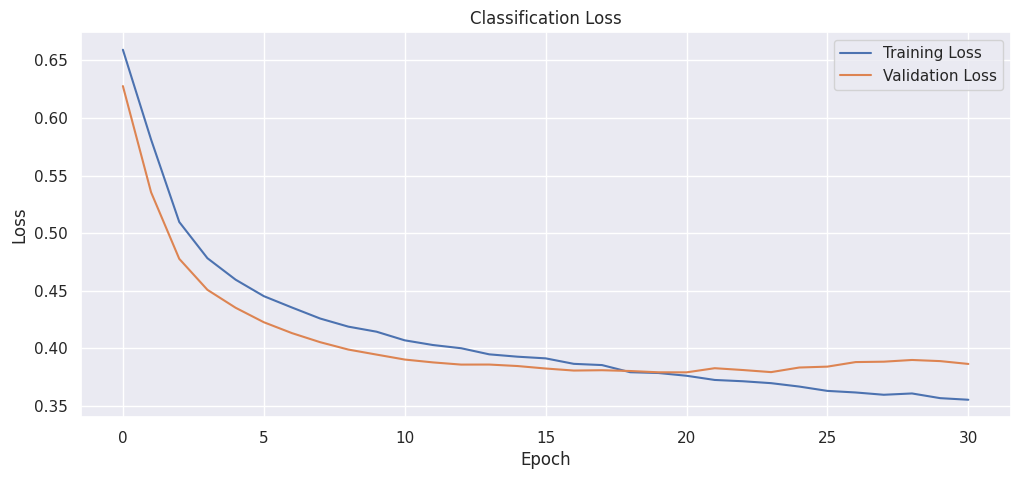

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Regression

We do the same for the regression part.

First we define target and test features.

In [264]:
features = [col for col in df.columns if col not in ['timestamp', 'cnt']]
X = df[features].values
y = df['cnt'].values

Then we normalize numerical columns so all the values be within a same range.

In [265]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

As we did for classification part, we split the data into train and test sets and keep %20 of the train set for the validation set.

In [266]:
split_idx = int(0.8 * len(df))
X_train_full = X_scaled[:split_idx]
X_test = X_scaled[split_idx:]
y_train_reg_full = y_scaled[:split_idx]
y_test = y_scaled[split_idx:]

val_split_idx = int(0.8 * len(X_train_full))
X_train = X_train_full[:val_split_idx]
X_val = X_train_full[val_split_idx:]
y_train = y_train_full[:val_split_idx]
y_val = y_train_full[val_split_idx:]

Then we create time series dataset.

In [267]:
seq_len = 10
batch_size = 32

train_dataset = timeseries_dataset_from_array(
    data=X_train[:-seq_len],
    targets=y_train[seq_len:],
    sequence_length=seq_len,
    batch_size=batch_size
)
val_dataset = timeseries_dataset_from_array(
    data=X_val[:-seq_len],
    targets=y_val[seq_len:],
    sequence_length=seq_len,
    batch_size=batch_size
)
test_dataset = timeseries_dataset_from_array(
    data=X_test[:-seq_len],
    targets=y_test[seq_len:],
    sequence_length=seq_len,
    batch_size=batch_size
)

Now we create a 3-layer neural network as we did for classification part and set the loss function to mse.

In [288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    LSTM(128, input_shape=(seq_len, X.shape[1]), activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Then we define callbacks similar to classification.

In [269]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

Now it's time to train our model.

In [270]:
history = model.fit(
    train_dataset,
    epochs=60,
    validation_data=val_dataset,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/60
348/348 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - loss: 0.1965 - val_loss: 0.1070 - learning_rate: 0.0010
Epoch 2/60
348/348 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 0.1134 - val_loss: 0.0829 - learning_rate: 0.0010
Epoch 3/60
348/348 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.0980 - val_loss: 0.0912 - learning_rate: 0.0010
Epoch 4/60
348/348 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0893 - val_loss: 0.0886 - learning_rate: 0.0010
Epoch 5/60
348/348 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 0.0847 - val_loss: 0.0916 - learning_rate: 0.0010
Epoch 6/60
348/348 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0799 - val_loss: 0.0950 - learning_rate: 0.0010
Epoch 7/60
348/348 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 0.0767 - val_loss: 0.0851 - learning_rate: 0.0010
Epoch 8/60
348/348 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 0.0729 - val_loss: 0.0727 - learning_rate: 5.0000e-04
Epoch 9/60
348/348 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 0.0711 - val_loss: 0.0708 - learning_r

Now we compute the r2 score.

In [273]:
y_pred_scaled = model.predict(test_dataset)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_eval = y[split_idx + seq_len:split_idx + seq_len + len(y_pred_scaled)]
r2 = r2_score(y_test_eval, y_pred)
print(f'Regression R2-score: {r2:.3f}')

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Regression R2-score: 0.275


Let's do some feature engineering to improve our prediction.

Since I want to create features with the timestemp column, I load the dataframe again.

In [275]:
df = pd.read_csv('london_merged.csv')

We create hour and day of the week column.

In [276]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

We use cyclical encoding so the model recognizes the cyclical pattern in hours and days of week(e.g hour 0 is close to hour 23, day 6 is close to day 0).

In [277]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

Now we drop the original day and hour columns since we don't need them anymore.

In [278]:
df = df.drop(['hour', 'day_of_week'], axis=1)

Next we define target and test features.

In [279]:
features = [col for col in df.columns if col not in ['timestamp', 'cnt']]
X = df[features].values
y = np.log1p(df['cnt'].values)

Then we normalize numerical columns so all the values be within a same range.

In [280]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

As we did for classification part, we split the data into train and test sets and keep %20 of the train set for the validation set.

In [281]:
split_idx = int(0.8 * len(df))
X_train_full = X_scaled[:split_idx]
X_test = X_scaled[split_idx:]
y_train_full = y_scaled[:split_idx]
y_test = y_scaled[split_idx:]

val_split_idx = int(0.8 * len(X_train_full))
X_train = X_train_full[:val_split_idx]
X_val = X_train_full[val_split_idx:]
y_train = y_train_full[:val_split_idx]
y_val = y_train_full[val_split_idx:]

Then we create time series datasets.

In [282]:
seq_len = 24
batch_size = 32

train_dataset = timeseries_dataset_from_array(
    data=X_train[:-seq_len],
    targets=y_train[seq_len:],
    sequence_length=seq_len,
    batch_size=batch_size
)
val_dataset = timeseries_dataset_from_array(
    data=X_val[:-seq_len],
    targets=y_val[seq_len:],
    sequence_length=seq_len,
    batch_size=batch_size
)
test_dataset = timeseries_dataset_from_array(
    data=X_test[:-seq_len],
    targets=y_test[seq_len:],
    sequence_length=seq_len,
    batch_size=batch_size
)

Now we create a 3-layer neural network as we did for classification part and set the loss function to mse.

In [283]:
model = Sequential([
    LSTM(128, input_shape=(seq_len, X.shape[1]), activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Then we define callbacks similar to classification.

In [284]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

Now it's time to train our model.

In [285]:
history = model.fit(
    train_dataset,
    epochs=60,
    validation_data=val_dataset,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/60
347/347 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - loss: 0.3968 - val_loss: 0.1632 - learning_rate: 0.0010
Epoch 2/60
347/347 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - loss: 0.1095 - val_loss: 0.1532 - learning_rate: 0.0010
Epoch 3/60
347/347 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - loss: 0.0786 - val_loss: 0.1222 - learning_rate: 0.0010
Epoch 4/60
347/347 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - loss: 0.0740 - val_loss: 0.1175 - learning_rate: 0.0010
Epoch 5/60
347/347 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - loss: 0.0660 - val_loss: 0.1145 - learning_rate: 0.0010
Epoch 6/60
347/347 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - loss: 0.0639 - val_loss: 0.1087 - learning_rate: 0.0010
Epoch 7/60
347/347 ━━━━━━━━━━━━━━━━━━━━ 36s 105ms/step - loss: 0.0619 - val_loss: 0.0970 - learning_rate: 0.0010
Epoch 8/60
347/347 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - loss: 0.0558 - val_loss: 0.0834 - learning_rate: 0.0010
Epoch 9/60
347/347 ━━━━━━━━━━━━━━━━━━━━ 32s 92ms/step - loss: 0.0559 - val_loss: 0.0847 - learning_ra

Now we compute the r2 score.

In [287]:
y_pred_scaled = model.predict(test_dataset).flatten() #predict on the test set
y_pred = np.expm1(scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()) #converting back to the original unit
y_test_eval = df['cnt'].values[split_idx + seq_len:split_idx + seq_len + len(y_pred_scaled)] #actual values
r2 = r2_score(y_test_eval, y_pred) #computing r2 score
print(f'R2-score: {r2:.3f}')

108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step
R2-score: 0.884
